In [1]:
import os

os.chdir("..")

In [2]:
import torch
from diffusers.pipelines import FluxPipeline
from src.flux.condition import Condition
from PIL import Image

from src.flux.generate import generate, seed_everything

In [3]:
pipe = FluxPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16
)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
pipe.load_lora_weights(
    "Yuanshi/OminiControl",
    weight_name=f"experimental/fill.safetensors",
    adapter_name="fill",
)

fill.safetensors:   0%|          | 0.00/29.1M [00:00<?, ?B/s]

c:\Users\transcodeur_ina\.conda\envs\omini\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\transcodeur_ina\.cache\huggingface\hub\models--Yuanshi--OminiControl. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


  0%|          | 0/28 [00:00<?, ?it/s]

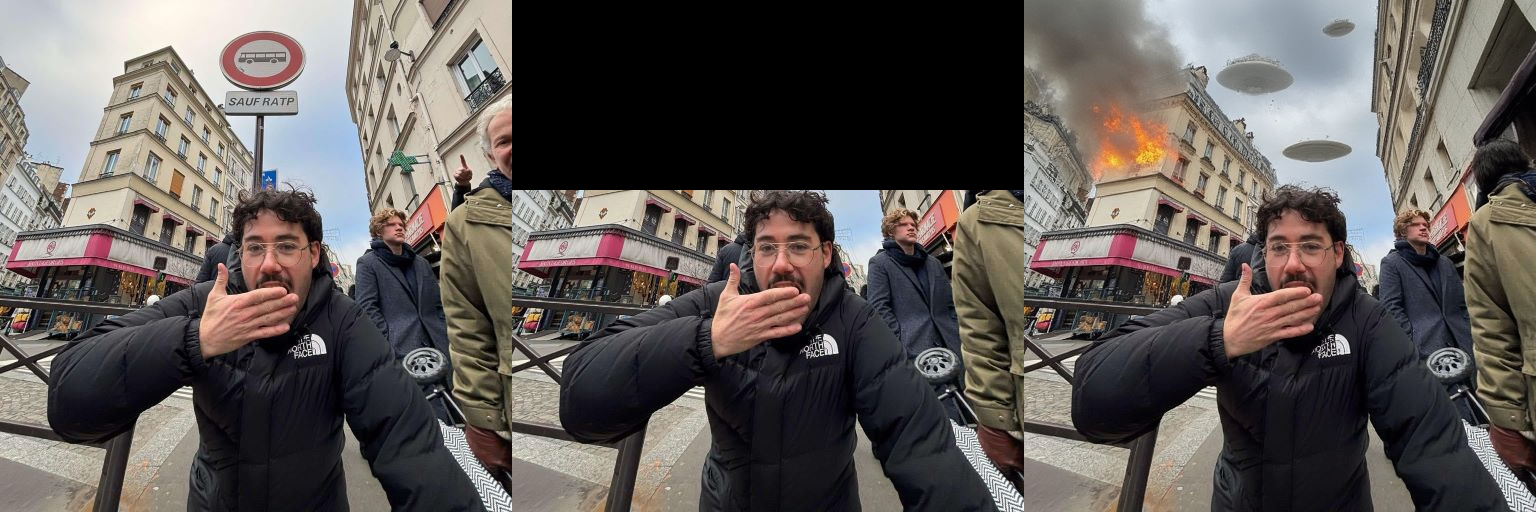

In [21]:
image = Image.open("assets/max.jpg").convert("RGB").resize((512, 512))

masked_image = image.copy()
masked_image.paste((0, 0, 0), (0, 0, 512, 190))
#masked_image.paste((0, 0, 0), (196, 284, 300, 385))

condition = Condition("fill", masked_image)

seed_everything()
result_img = generate(
    pipe,
    prompt="A boy is being attacked by UFOs in a parisian street. They are UFO spaceships in the sky, and buildings are on fire.",
    conditions=[condition],
).images[0]

concat_image = Image.new("RGB", (1536, 512))
concat_image.paste(image, (0, 0))
concat_image.paste(condition.condition, (512, 0))
concat_image.paste(result_img, (1024, 0))
concat_image

In [ ]:
image = Image.open("assets/book.jpg").convert("RGB").resize((512, 512))

w, h, min_dim = image.size + (min(image.size),)
image = image.crop(
    ((w - min_dim) // 2, (h - min_dim) // 2, (w + min_dim) // 2, (h + min_dim) // 2)
).resize((512, 512))


masked_image = image.copy()
masked_image.paste((0, 0, 0), (150, 150, 350, 250))
masked_image.paste((0, 0, 0), (200, 380, 320, 420))

condition = Condition("fill", masked_image)

seed_everything()
result_img = generate(
    pipe,
    prompt="A yellow book with the word 'OMINI' in large font on the cover. The text 'for FLUX' appears at the bottom.",
    conditions=[condition],
).images[0]

concat_image = Image.new("RGB", (1536, 512))
concat_image.paste(image, (0, 0))
concat_image.paste(condition.condition, (512, 0))
concat_image.paste(result_img, (1024, 0))
concat_image

In [22]:
concat_image.save("outputs/max-UFOs.png")